In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
train = pd.read_csv(r"C:\Users\datta\OneDrive\Desktop\py\analytics\archive (2)\train.csv", encoding="latin1")

we have used "read_csv" function from pandas library to read csv file to dataframe. we have used r before file path it means it is string literal.
latin1 is type of encoding it is used when the file contains special characters that might not be handled correctly by the default UTF-8 encoding.

In [58]:
test = pd.read_csv(r"C:\Users\datta\OneDrive\Desktop\py\analytics\archive (2)\test.csv", encoding="latin1")

In [59]:
train = train[["text","sentiment"]]
test = test[["text","sentiment"]]

it selects the columns 'text' and 'sentiment' from the train DataFrame and similarly second line from test dataframe.
The double square brackets indicate that we are selecting multiple columns to form a new DataFrame that contains only these two columns.
text columns contains reviews, tweets, comments that you want to analyze for sentiment.
sentiment column contains the labels indicating the sentiment of the corresponding text (e.g., positive, negative, neutral).

In [61]:
train["text"].fillna("",inplace=True)
test["text"].fillna("",inplace=True)

fillna part of the code tells pandas to look for any NaN values in the text column and replace them with an empty string.
inplace=True ensures that this operation changes the train DataFrame directly, rather than returning a modified copy of it.

In [62]:
def func(sentiment):
    if sentiment =='positive':
        return 0;
    elif sentiment =='negative':
        return 1;
    else:
        return 2;
train['sentiment'] = train['sentiment'].apply(func)
test['sentiment'] = test['sentiment'].apply(func)

we have defined function sentiment to map sentiment labels to numerical values and 
applies this function to the sentiment column in both the train and test DataFrame

In [63]:
x_train = np.array(train['text'].tolist())
y_train = np.array(train['sentiment'].tolist())
x_test = np.array(test['text'].tolist())
y_test = np.array(test['sentiment'].tolist())

first line :
This selects the 'text' column from the DataFrame train.
The .tolist() method converts the column (a pandas Series) into a Python list.
The np.array() function from NumPy is used to convert the Python list obtained from the 'text' column into a NumPy array.
it is done for processing such as tokenization, vectorization, and model training. 

In [64]:
x_train

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype='<U159')

In [65]:
y_train

array([2, 1, 1, ..., 0, 0, 2])

In [66]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

it converts the categorical labels in y_train into one-hot encoded vectors using the to_categorical function.
One-hot encoding creates binary vectors. for example. for positive: [1,0,0] for negative: [0,1,0] for neutral: [0,0,1]

In [67]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [68]:
tokenizer = Tokenizer(num_words=20000)

Tokenizer class is used to convert text data into sequences of tokens(individual words)

In [69]:
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

it fits tokenizer to text data.

In [70]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'the': 3,
 'a': 4,
 'my': 5,
 'it': 6,
 'you': 7,
 'and': 8,
 'is': 9,
 'in': 10,
 's': 11,
 'for': 12,
 'of': 13,
 't': 14,
 'that': 15,
 'me': 16,
 'on': 17,
 'so': 18,
 'have': 19,
 'but': 20,
 'm': 21,
 'just': 22,
 'day': 23,
 'with': 24,
 'be': 25,
 'at': 26,
 'not': 27,
 'was': 28,
 'all': 29,
 'can': 30,
 'good': 31,
 'now': 32,
 'this': 33,
 'out': 34,
 'up': 35,
 'get': 36,
 'are': 37,
 'no': 38,
 'like': 39,
 'go': 40,
 'http': 41,
 'your': 42,
 'love': 43,
 'do': 44,
 'too': 45,
 'work': 46,
 'today': 47,
 'got': 48,
 'going': 49,
 'we': 50,
 'what': 51,
 'lol': 52,
 'happy': 53,
 'from': 54,
 'one': 55,
 'u': 56,
 'time': 57,
 'know': 58,
 'com': 59,
 'back': 60,
 'there': 61,
 'really': 62,
 'will': 63,
 'im': 64,
 'don': 65,
 'about': 66,
 'am': 67,
 'its': 68,
 'had': 69,
 'see': 70,
 'if': 71,
 'they': 72,
 'night': 73,
 'some': 74,
 'new': 75,
 'home': 76,
 '2': 77,
 'how': 78,
 'want': 79,
 'well': 80,
 'think': 81,
 'as': 82,
 'oh': 83,
 'still':

After tokenization, the Tokenizer maintains an internal vocabulary where each unique token is mapped to a numerical index.
here this vocabulary is assessed. it returns a dictionary mapping tokens to their corresponding indices.

In [71]:
vocab = len(tokenizer.word_index)+1

 vocabulary size is to determine the number of unique words or tokens in the text data. 

In [72]:
vocab

28615

In [73]:
len(tokenizer.word_index)

28614

In [74]:
sq_train = tokenizer.texts_to_sequences(x_train)
sq_test = tokenizer.texts_to_sequences(x_test)

Tokenizer object converts a list of text documents (x_train) into sequences of token indices.
Each text document is tokenized (split into words) and the corresponding numerical indices 
from the tokenizer's vocabulary are used to represent each token.

it is done for The purpose of converting text data into sequences of token indices.ml models and rnn needs numerical input data than raw text.

In [96]:
max_len = max([len(i) for i in x_train])

This creates a list of lengths, where each element represents the length of a sequence in x_train.

In [97]:
max_len

35

In [77]:
from tensorflow.keras.utils import pad_sequences
x_train = sequence.pad_sequences(sq_train, padding="post", maxlen=35)  # Set maxlen to 35
x_test = sequence.pad_sequences(sq_test, padding="post", maxlen=35)  


padding sequences is used so that they all have the same length

In [78]:
x_train[0]

array([   1,  162,   19, 7713,   71,    1,  151,   49,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

In [80]:
x_train.shape

(27481, 35)

x_train has 27481 sequences and each has been padded to maximum length of 35.

In [81]:
labels = np.array([1 if i == "negative" else 0 for i in "sentiment"])

MODEL ARCHITECTURE

In [85]:
model = Sequential([
        Embedding(input_dim=20000, output_dim=5, input_length=35),
        SimpleRNN(20),
        Dense(3,activation="softmax")
])

Embedding layer to convert token indices into dense vectors,
followed by a SimpleRNN layer to process sequential information,
and finally a Dense layer for classification.

In [93]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 35, 5)               │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 20)                  │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301,751 (1.15 MB)

 Trainable params: 100,583 (392.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 201,168 (785.82 KB)

In [89]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

evaluation metrics accuracy is used which measures 
the fraction of correctly classified samples out of the total number of samples.

In [90]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4151 - loss: 1.0748 - val_accuracy: 0.6530 - val_loss: 0.8794
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5925 - loss: 0.8841 - val_accuracy: 0.7036 - val_loss: 0.8135
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6987 - loss: 0.7170 - val_accuracy: 0.6827 - val_loss: 0.8767
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7773 - loss: 0.5794 - val_accuracy: 0.6852 - val_loss: 0.8025
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8287 - loss: 0.4638 - val_accuracy: 0.7051 - val_loss: 0.8022
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8640 - loss: 0.3861 - val_accuracy: 0.6995 - val_loss: 0.8639
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8928 - loss: 0.3137 - val_accuracy: 0.6966 - val_loss: 0.8922
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9134 - loss: 0.2700 - val_accuracy: 0.

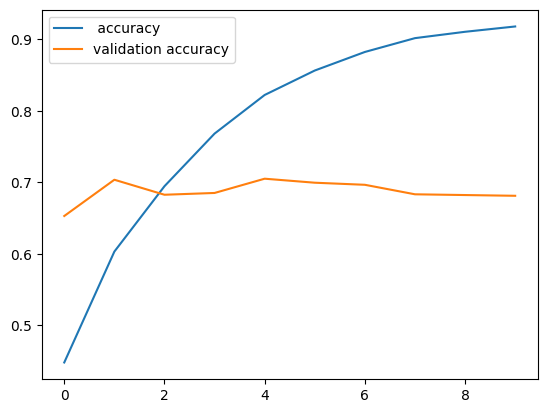

In [100]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label=" accuracy")
plt.plot(history.history['val_accuracy'], label="validation accuracy")
plt.legend()
plt.show()

In [94]:
# Prediction 1
text = "The movie was bad bad bad, i will not recommend this movie to anyone"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Negative Sentiment


In [95]:
# Prediction 2

text = "The movie was good, i will recommend this movie to anyone"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Postive Sentiment
